In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_excel(r'C:\Users\xhiva\OneDrive\Desktop\Stock Predicttion\Minor Project Data set (Stock Price Prediction).xlsx', index_col='Date', parse_dates = True)

data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700


In [3]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

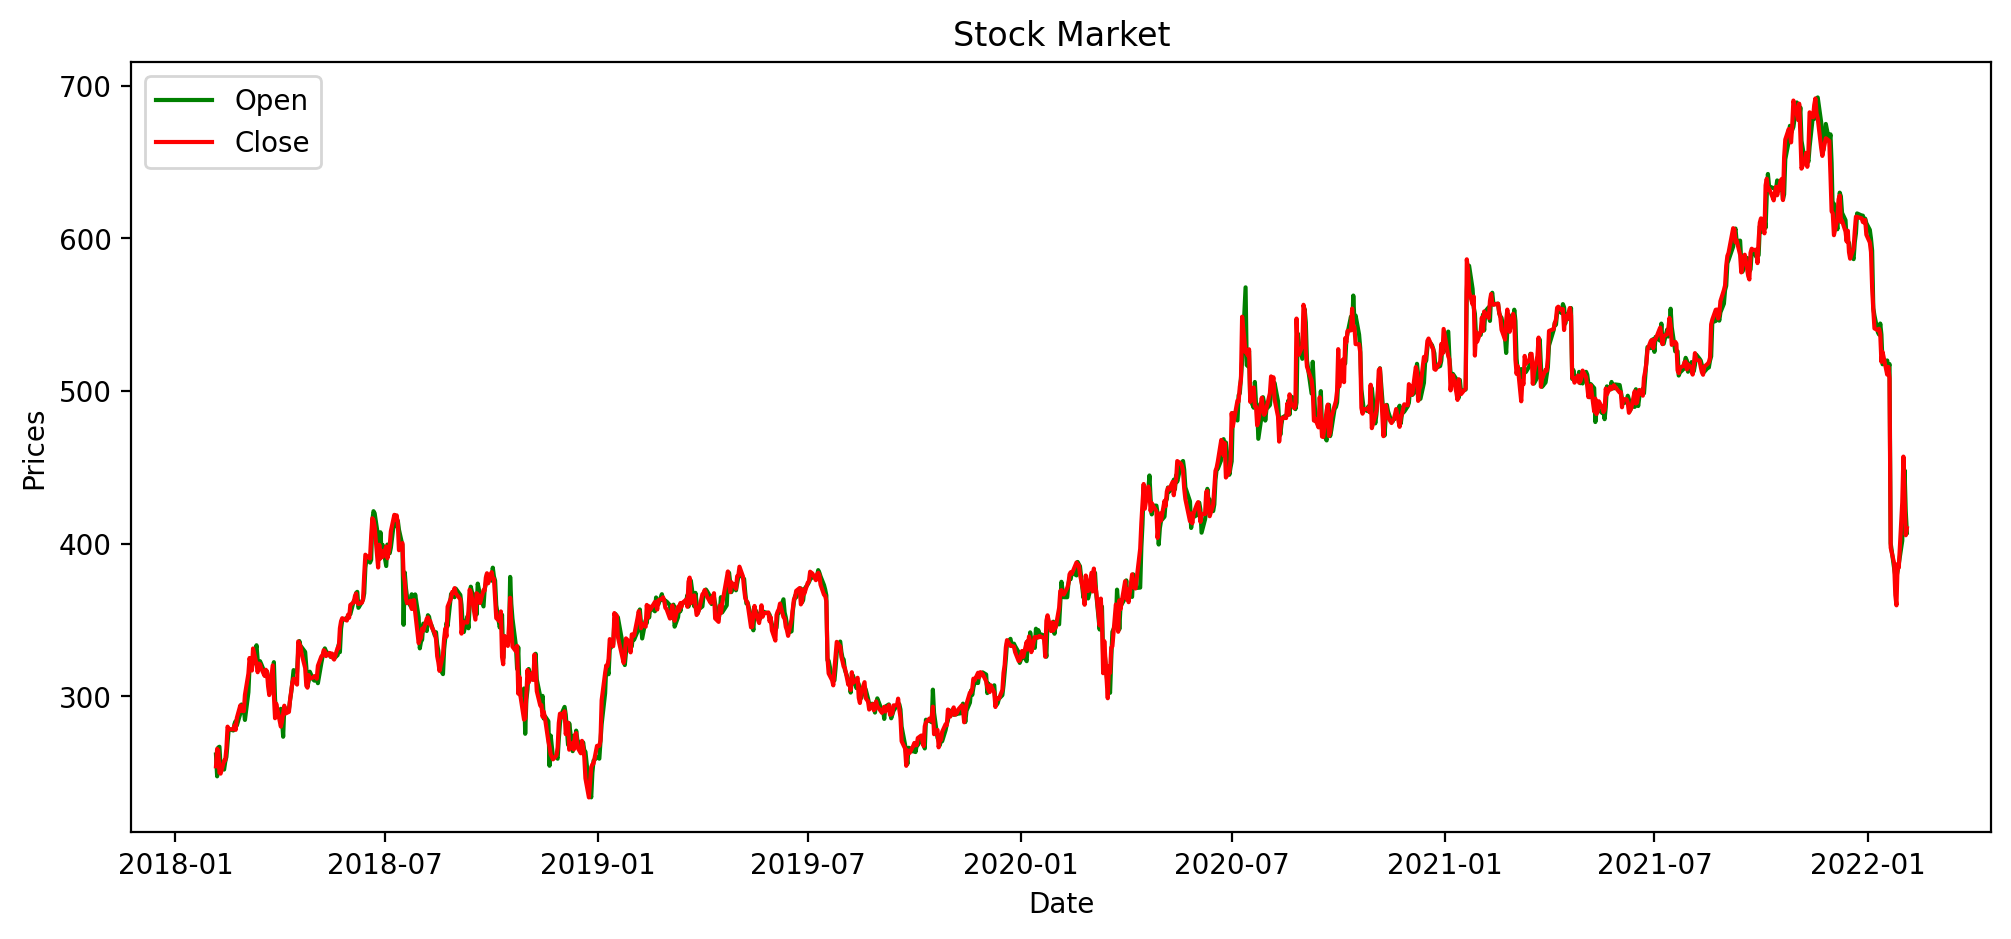

In [4]:
plt.figure(figsize=(12, 5), dpi=200)

plt.title("Stock Market")
plt.xlabel('Date')
plt.ylabel('Prices')

plt.plot(data['Open'], label='Open', color='green')
plt.plot(data['Close'], label='Close', color='red')

plt.legend()
plt.show()

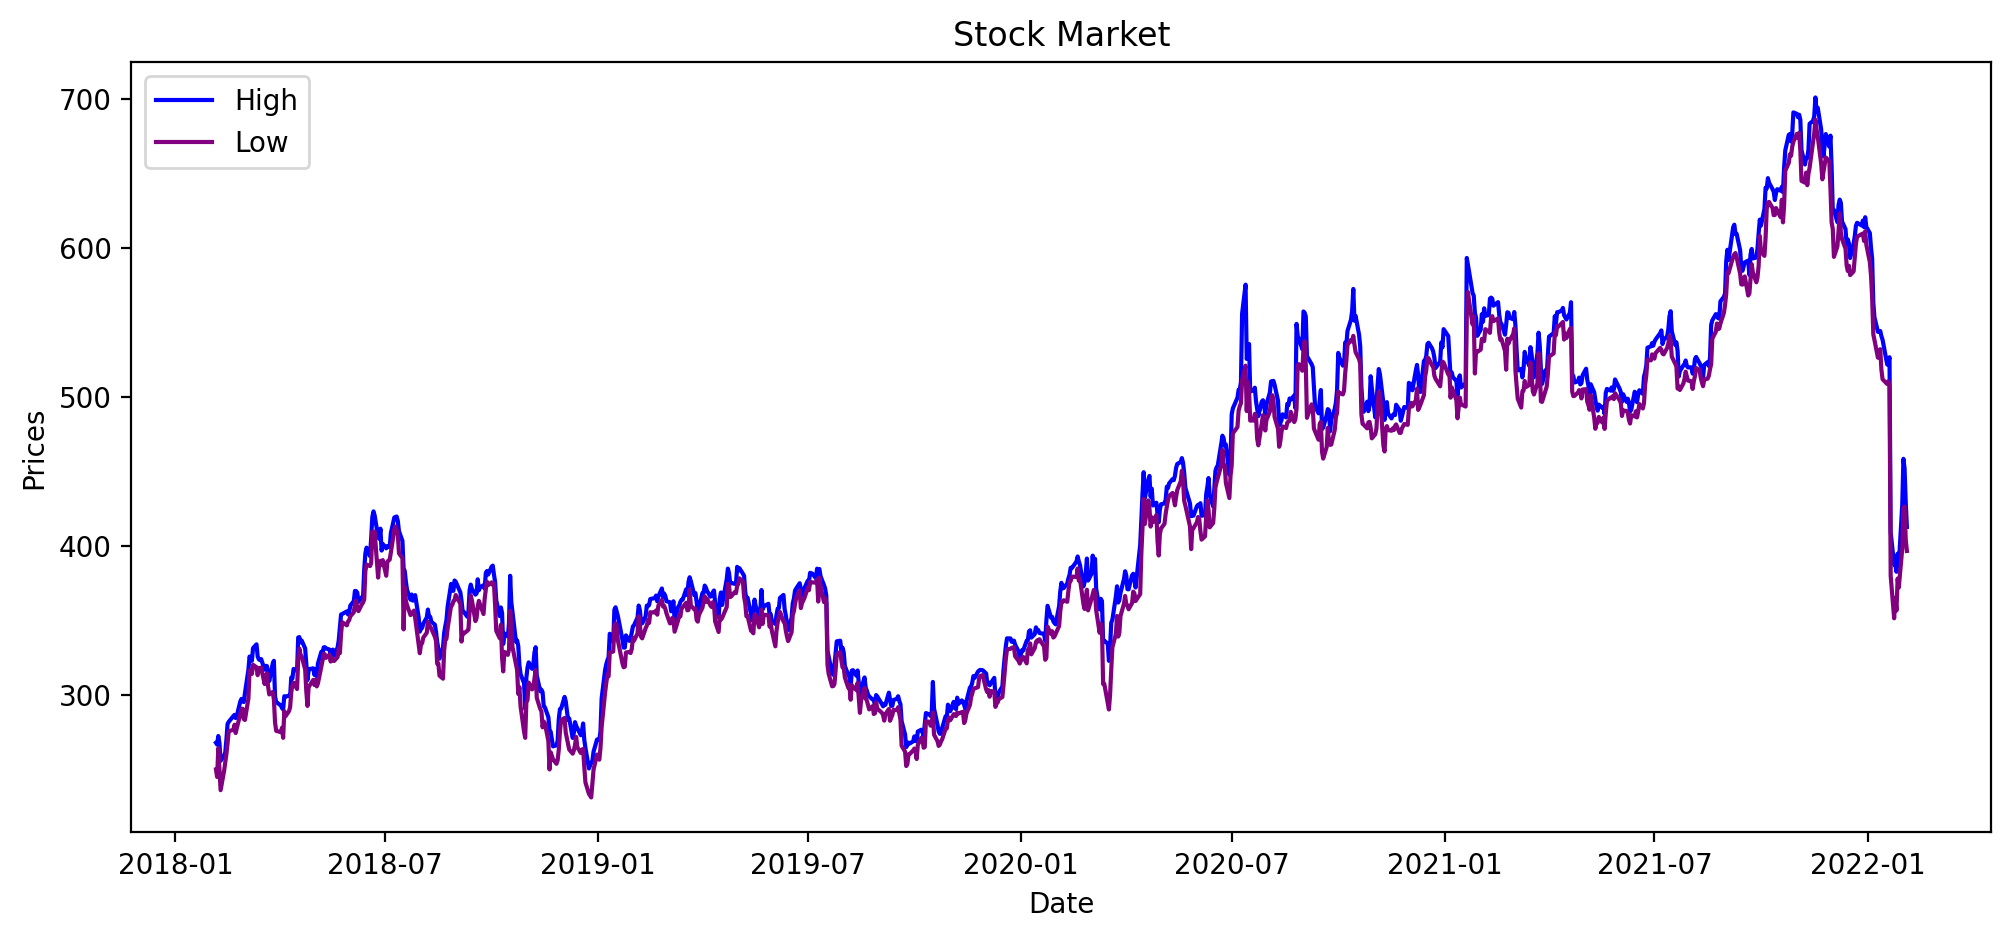

In [5]:
plt.figure(figsize=(12, 5), dpi=200)

plt.title("Stock Market")
plt.xlabel('Date')
plt.ylabel('Prices')

plt.plot(data['High'], label='High', color='blue')
plt.plot(data['Low'], label='Low', color='purple')

plt.legend()
plt.show()

In [6]:
training_data = data[data.index < '2020-01-01']
testing_data = data[data.index >= '2020-01-01']


training_data.shape, testing_data.shape

((480, 6), (529, 6))

In [7]:
training_data = training_data.filter(['Open', 'High', 'Low', 'Close', 'Volume'])
training_data.shape

(480, 5)

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_data = scaler.fit_transform(training_data)

scaled_training_data

array([[0.14979196, 0.09996523, 0.10338193, 0.11010854, 0.17514821],
       [0.07350901, 0.09301123, 0.07572177, 0.1720244 , 0.18755619],
       [0.17422377, 0.12633298, 0.18201811, 0.16575716, 0.12346275],
       ...,
       [0.52832599, 0.48197737, 0.52119889, 0.51439836, 0.0534978 ],
       [0.50762822, 0.45514609, 0.50387679, 0.48317032, 0.04064826],
       [0.46986023, 0.43040114, 0.49414355, 0.48457509, 0.0300402 ]])

In [9]:
X_train = []
y_train = []

for i in range(60, scaled_training_data.shape[0]-60):
    X_train.append(scaled_training_data[i-60:i])
    y_train.append(scaled_training_data[i,[0, 3]])

In [10]:
X_train, y_train = np.array(X_train), np.array(y_train)

X_train.shape, y_train.shape

((360, 60, 5), (360, 2))

In [11]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import mean_squared_error

In [12]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 2))

C:\Users\xhiva\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer = Adam(), loss = 'mean_squared_error')

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,702 (201.96 KB)

 Trainable params: 51,702 (201.96 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.2386 - val_loss: 0.0698
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0476 - val_loss: 0.0364
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0309 - val_loss: 0.0284
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0256 - val_loss: 0.0276
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0207 - val_loss: 0.0172
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0188 - val_loss: 0.0165
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0200 - val_loss: 0.0325
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0167 - val_loss: 0.0276
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0137 - val_loss: 0.0175
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0158 - val_loss: 0.0173
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0169 - val_loss: 0.0205
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0190 - val_lo

Epoch 70/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0106 - val_loss: 0.0203
Epoch 71/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0096 - val_loss: 0.0225
Epoch 72/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0094 - val_loss: 0.0352
Epoch 73/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0100 - val_loss: 0.0218
Epoch 74/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0103 - val_loss: 0.0180
Epoch 75/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0107 - val_loss: 0.0174
Epoch 76/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0104 - val_loss: 0.0247
Epoch 77/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0092 - val_loss: 0.0257
Epoch 78/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0080 - val_loss: 0.0260
Epoch 79/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0092 - val_loss: 0.0195
Epoch 80/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0086 - val_loss: 0.0200
Epoch 81/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0083

In [16]:
metrics = pd.DataFrame(model.history.history)

In [17]:
metrics.head()

,loss,val_loss
0,0.145510,0.069808
1,0.042703,0.036403
2,0.030350,0.028356
3,0.027313,0.027569
4,0.022066,0.017221


Text(0, 0.5, 'Loss')

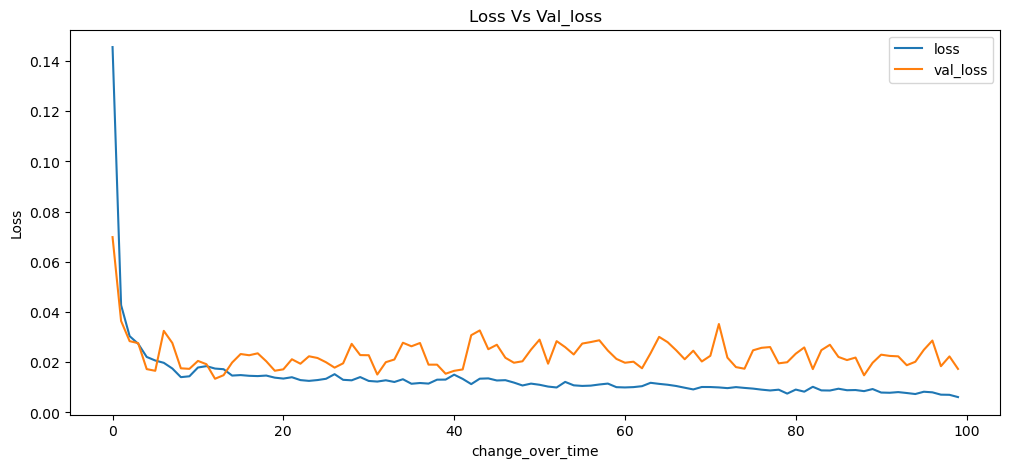

In [18]:
metrics[['loss','val_loss']].plot(figsize=(12, 5))
plt.title("Loss Vs Val_loss")
plt.xlabel('change_over_time')
plt.ylabel('Loss')

In [19]:
model.save('stock_predictor_3.keras')

In [20]:
testing_data = testing_data.filter(['Open', 'High', 'Low', 'Close', 'Volume'])
testing_data.shape

(529, 5)

In [21]:
past_60_days_data = training_data.tail(60)

In [28]:
import pandas as pd

new_testing_data = pd.concat([past_60_days_data, testing_data], ignore_index=True)
print(new_testing_data.shape)

(589, 5)


In [29]:
scaled_testing_data = scaler.transform(new_testing_data)
scaled_testing_data

array([[0.20308327, 0.15084608, 0.22023649, 0.21924462, 0.07991155],
       [0.20863117, 0.14418177, 0.21671719, 0.19903829, 0.07549241],
       [0.19257436, 0.11793003, 0.18333799, 0.18180342, 0.08467826],
       ...,
       [1.14333721, 1.16672474, 1.07368724, 1.05678324, 0.218593  ],
       [1.00032005, 1.03506038, 0.95160853, 0.9277649 , 0.13984299],
       [0.92494395, 0.93949929, 0.90959597, 0.95245563, 0.10219875]])

In [30]:
X_test = []
y_test = []

for i in range(60, scaled_testing_data.shape[0]):
    X_test.append(scaled_testing_data[i-60:i])
    y_test.append(scaled_testing_data[i,[0,3]])

In [31]:
X_test, y_test = np.array(X_test), np.array(y_test)

X_test.shape, y_test.shape


((529, 60, 5), (529, 2))

In [32]:
loss = model.evaluate(X_test, y_test)
loss

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0434


0.08554689586162567

In [33]:
model = keras.models.load_model('stock_predictor_3.keras')

In [34]:
predictions = model.predict(X_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [35]:
mean_error = mean_squared_error(y_test, predictions)

mean_error

0.08636421511248836

In [36]:
scaler.scale_

array([5.33447115e-03, 5.79508587e-03, 5.49903794e-03, 5.40277714e-03,
       1.77332948e-08])

In [37]:
scale_open = 1/5.05970449e-03
scale_close = 1/5.00575662e-03

In [38]:
predicted_open = predictions[:, 0]
predicted_close = predictions[:, 1]

predicted_open = predicted_open * scale_open
predicted_close = predicted_close * scale_close

In [39]:
actual_open = y_test[:, 0]
actual_close = y_test[:, 1]

actual_open = actual_open * scale_open
actual_close = actual_close * scale_close

In [42]:
new_open_df = pd.DataFrame({"Actual Open": actual_open, "Predicted Open": predicted_open})

new_open_df.head(40)

,Actual Open,Predicted Open
0,97.185833,119.257034
1,97.902753,117.156601
2,94.043992,115.749687
3,108.118969,115.395958
4,102.868519,115.748848
5,113.949274,117.177956
6,108.814814,119.111404
7,103.195351,119.924355
8,116.479599,120.143616
9,110.448974,119.881203


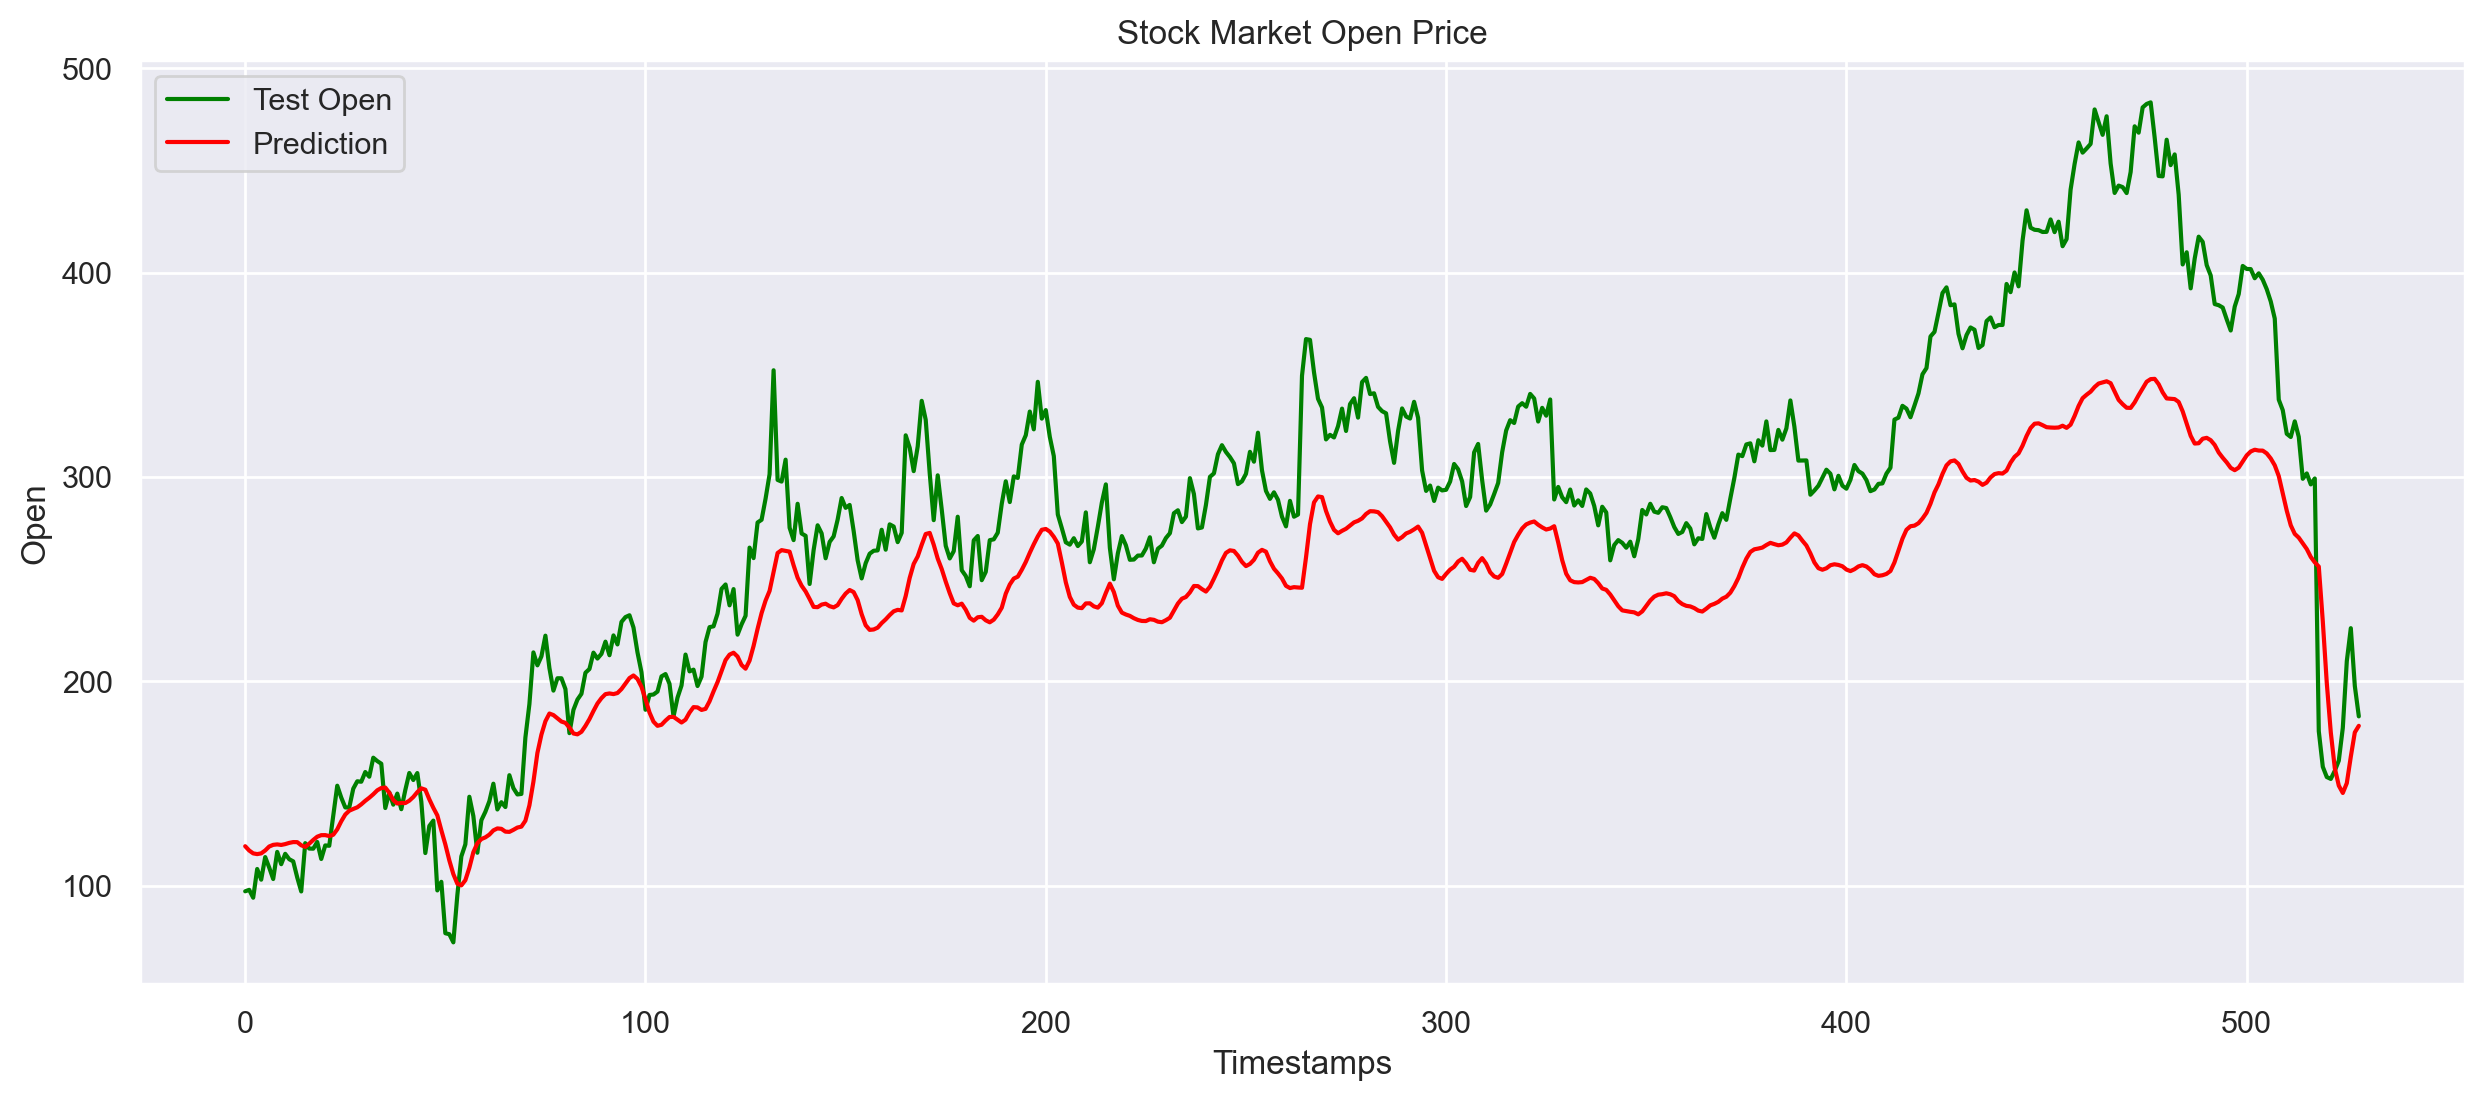

In [43]:
sns.set(style='darkgrid')
plt.figure(figsize=(15, 6), dpi=200)

plt.title("Stock Market Open Price")
plt.xlabel('Timestamps')
plt.ylabel('Open')

plt.plot(new_open_df['Actual Open'], color='green')
plt.plot(new_open_df['Predicted Open'], color='red')

plt.legend(['Test Open', 'Prediction'], loc='upper left')
plt.savefig('stock_prediction_open_3.png', dpi=200)
plt.show()

In [44]:
new_close_df = pd.DataFrame({"Actual Close": actual_close, "Predicted Close": predicted_close})

new_close_df.head()

,Actual Close,Predicted Close
0,103.538468,122.267281
1,99.318351,120.268082
2,110.035920,118.865417
3,104.553025,118.413292
4,113.737987,118.574684


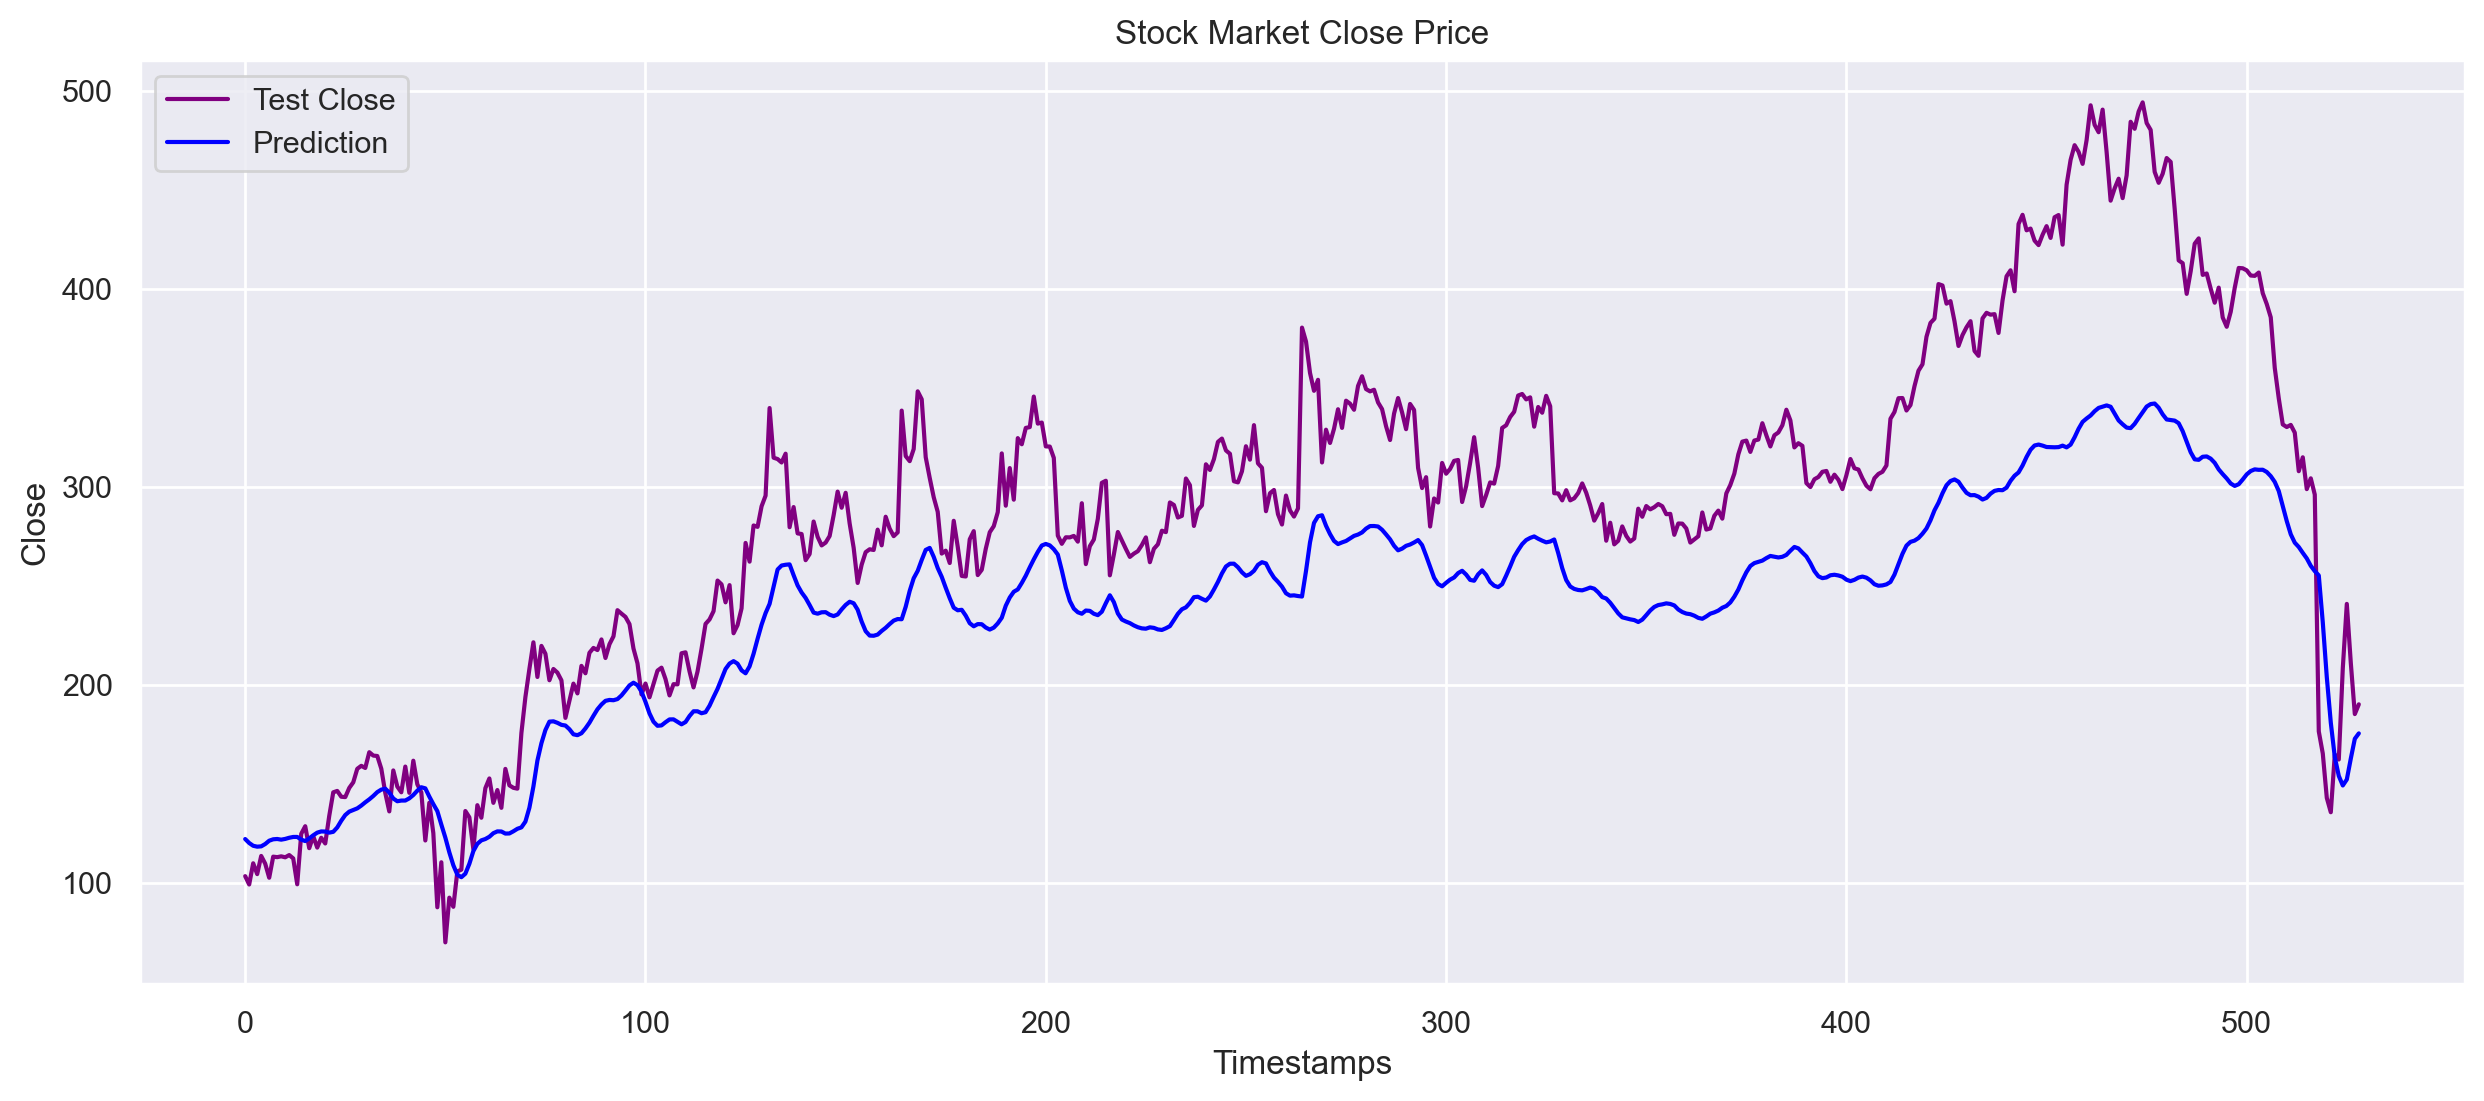

In [45]:
sns.set(style='darkgrid')
plt.figure(figsize=(15, 6), dpi=200)

plt.title("Stock Market Close Price")
plt.xlabel('Timestamps')
plt.ylabel('Close')

plt.plot(new_close_df['Actual Close'], color='purple')
plt.plot(new_close_df['Predicted Close'], color='blue')

plt.legend(['Test Close', 'Prediction'], loc='upper left')
plt.savefig('stock_prediction_close_3.png', dpi=200)
plt.show()